In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 2.
In order to generate a $n\times n$ matrix whose entries are random numbers uniformly distributed in $[-1, 1]$, we define the following function:

In [2]:
def uniform_mat(n):
    ''' Generate a n x n matrix with entries'''
    a = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            a[(i,j)] = random.random() * 2.0 - 1.0
    return a

### 3.
We first define a function that exchanges the rows inside a mtrix. We can then define the function `gaussian_elimination`,
which performs gaussian elimination with partial pivoting on the matrix and return the resulting upper triangular matrix.

In [3]:
def exchange_rows(mat, n, i1, i2):
    ''' Exchange the i1-th and i2-th rows of mat '''
    for i in range(n):
        mat[(i1, i)], mat[(i2, i)] = mat[(i2, i)], mat[(i1, i)]

def gaussian_eliminate(mat):
    ''' Perform Gaussian elimination with partial pivoting on the square matrix mat and
    return the upper triangular matrix U '''
    (n, _) = mat.shape
    for i in range(n):
        m_value = mat[(i,i)]
        m_index = i
        # Find the maximal value and its index in the i-th column
        for j in range(i,n):
            if mat[(j,i)] > m_value:
                m_value = mat[(j,i)]
                m_index = j
        # Perform row reduction
        exchange_rows(mat, n, i, m_index)
        for k in range(i+1, n):
            a = mat[(k,i)] / m_value
            mat[(k,i)] = 0
            for j in range(i+1, n):
                mat[(k,j)] -= mat[(i, j)] * a
    return mat

In [4]:
m = np.array(([2.0, 1.0, 1.0], [4.0, 3.0, 3.0], [8.0, 7.0, 9.0]))
print(m)
#m2 = gaussian_elimination(m)
#print(m, m2)

[[2. 1. 1.]
 [4. 3. 3.]
 [8. 7. 9.]]


### 4.
We define a function growth_factor that computes the growth factor of a matrix. Using this function, we can plot the growth factor against the matrix size.

In [5]:
def growth_factor(A):
    amax = np.abs(A).max()
    gaussian_eliminate(A)
    umax = np.abs(A).max()
    return umax / amax

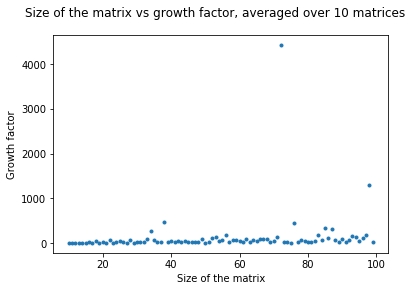

In [6]:
x = range(10, 1000) # takes a while
y = [np.average([growth_factor(uniform_mat(n)) for i in range(5)]) for n in x]
plt.xlabel('Size of the matrix')
plt.ylabel('Growth factor')
plt.suptitle('Size of the matrix vs growth factor, averaged over 10 matrices')
plt.scatter(x, y, marker='.')
plt.show()

### 5.
We plot the histogram for $n = 16, 32, 64$. From this, we conjecture that the probability density decays exponentially as the growth factor becomes large.

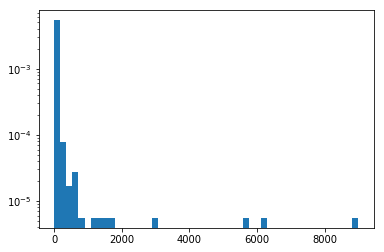

In [7]:
n = 16
growth_factors = [growth_factor(uniform_mat(n)) for i in range(1000)]
plt.hist(growth_factors, 50, log=True, normed=True)
plt.show()

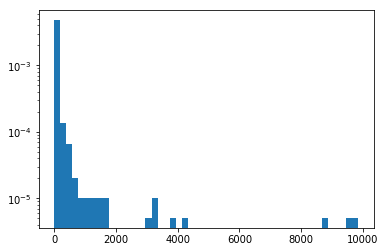

In [8]:
n = 32
growth_factors = [growth_factor(uniform_mat(n)) for i in range(1000)]
plt.hist(growth_factors, 50, log=True, normed=True)
plt.show()

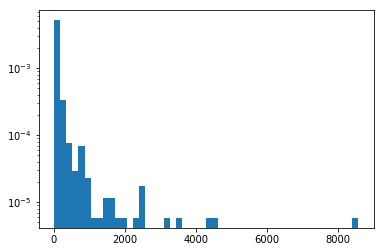

In [9]:
n = 64
growth_factors = [growth_factor(uniform_mat(n)) for i in range(1000)]
plt.hist(growth_factors, 50, log=True, normed=True)
plt.show()

### 6.

In [10]:
def normal_mat(n, mu=0.0, sigma=1.0):
    ''' Generate a n x n matrix with entries given by '''
    a = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            a[(i,j)] = np.random.normal(mu, sigma)
    return a

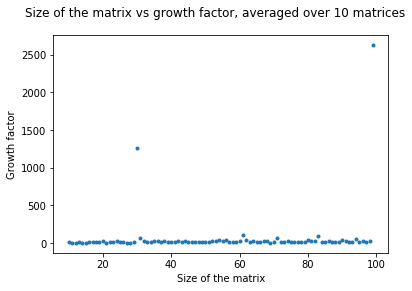

In [11]:
x = range(10, 1000) # takes a while
y = [np.average([growth_factor(normal_mat(n)) for i in range(5)]) for n in x]
plt.xlabel('Size of the matrix')
plt.ylabel('Growth factor')
plt.suptitle('Size of the matrix vs growth factor, averaged over 10 matrices')
plt.scatter(x, y, marker='.')
plt.show()

We plot the histogram for $n = 16, 32, 64$. From this, we conjecture that the probability density decays exponentially as the growth factor becomes large.

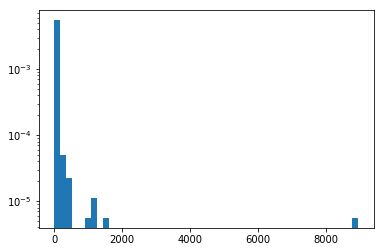

In [12]:
n = 16
growth_factors = [growth_factor(normal_mat(n)) for i in range(1000)]
plt.hist(growth_factors, 50, log=True, normed=True)
plt.show()

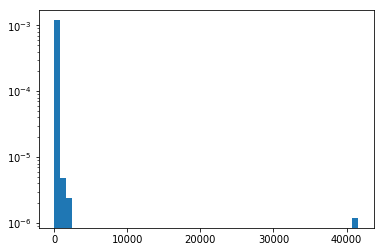

In [13]:
n = 32
growth_factors = [growth_factor(normal_mat(n)) for i in range(1000)]
plt.hist(growth_factors, 50, log=True, normed=True)
plt.show()

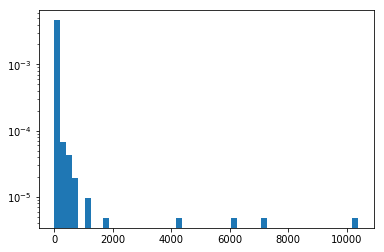

In [14]:
n = 64
growth_factors = [growth_factor(normal_mat(n)) for i in range(1000)]
plt.hist(growth_factors, 50, log=True, normed=True)
plt.show()